# Authors
- Filip Finfando
- Javier de la Rúa Martínez

# Introduction
This document is a report created as an assignment for ID2222 course at KTH. The main goal of the assignment was to implement the apriori algorithm to extract the frequent itemsets of a sale transaction dataset with a predefined support. Additionally, the extraction of association rules with a specific confidence based on these frequent itemsets have been developed. We used the given dataset of sale transactions. This dataset, together with some test datasets can be found in 'test/data' folder in the repository.

# Solution
We  decided  to  develop  a  project  in Python 3.7 using  popular  libraries  provided in `requirements.txt` file in the repository.  The whole repository itself is attached to this report. In order to fulfill the task assigned we implemented the following scripts:
1. Run, main scripts to run the tests and print the results.
2. Apriori, representing  an instance of the apriori algorithm and providing methods for extracting candidates, frequent itemsets and association rules.

# Running
In order for the solution to run, Python 3.7 has to be installed.  We recommend creating a virtual environment for the purpose of evaluating the solution. One can either use command line `python run.py` or run the programme in attached jupyter notebook: `ID2222 HM2 - Discovery of Frequent Itemsets and Association Rules.ipynb`. Below is the output of the jupyter notebook presenting the example run of the program. We have run the experiment with minimum support of 0.01 and minimum confidence 0.20.

# Creating Apriori instance and generating baskets

In [1]:
import os
import timeit
from apriori import Apriori

PATH = os.getcwd() + "/test/data/T10I4D100K.dat"
N = 100000
SUPPORT = 0.01
CONFIDENCE = 0.20

# create a new instance of Apriori
apriori = Apriori()

# load baskets
lb_ms = timeit.timeit("apriori.load_baskets(PATH, n=N, sep=' ', duplicates=False, verbose=True)", number=1, globals=globals())
print("Baskets loaded: {} seconds".format(lb_ms))

for basket in apriori.baskets[:10]:
    print(basket)

Reading 100000 lines...
Baskets loaded: 0.0974139 seconds
['25', '52', '164', '240', '274', '328', '368', '448', '538', '561', '630', '687', '730', '775', '825', '834']
['39', '120', '124', '205', '401', '581', '704', '814', '825', '834']
['35', '249', '674', '712', '733', '759', '854', '950']
['39', '422', '449', '704', '825', '857', '895', '937', '954', '964']
['15', '229', '262', '283', '294', '352', '381', '708', '738', '766', '853', '883', '966', '978']
['26', '104', '143', '320', '569', '620', '798']
['7', '185', '214', '350', '529', '658', '682', '782', '809', '849', '883', '947', '970', '979']
['227', '390']
['71', '192', '208', '272', '279', '280', '300', '333', '496', '529', '530', '597', '618', '674', '675', '720', '855', '914', '932']
['183', '193', '217', '256', '276', '277', '374', '474', '483', '496', '512', '529', '626', '653', '706', '878', '939']


## Candidates and frequent items per iteration

In [2]:
# get candidates and frequent itemsets
c_ms = timeit.timeit("apriori.compute(min_support=SUPPORT, stop=False, verbose=False)", number=1, globals=globals())
print("Apriori computed: {} seconds".format(c_ms))

for i in range(0, len(apriori.candidates)):
    print("C{}: {} candidates".format(i, len(apriori.candidates[i])))
    print("L{}: {} frequent itemsets".format(i, len(apriori.frequent_itemsets[i])))

# Computing C1 and L1...
- 870 candidates in 685.9619617462158 ms



- 375 frequent itemsets in 26.00693702697754 ms
- 1 iteration completed in 712.9700183868408 ms
# Computing C2 and L2...



- 70125 candidates in 2972.9604721069336 ms



- 9 frequent itemsets in 74.00131225585938 ms
- 2 iteration completed in 3046.961784362793 ms
# Computing C3 and L3...



- 1 candidates in 18.004894256591797 ms



- 1 frequent itemsets in 20.994901657104492 ms
- 3 iteration completed in 38.99979591369629 ms
# Computing C4 and L4...



Apriori computed: 3.8178411 seconds
C0: 870 candidates
L0: 375 frequent itemsets
C1: 70125 candidates
L1: 9 frequent itemsets
C2: 1 candidates
L2: 1 frequent itemsets


## Association rules

In [3]:
gar_ms = timeit.timeit("apriori.get_association_rules(min_confidence=CONFIDENCE, verbose=True)", number=1, globals=globals())
print("Association rules computed: {} seconds".format(gar_ms))

print("Association rules: {} rules".format(len(apriori.association_rules)))
for r, (c, s) in apriori.association_rules.items():
    print("Rule: {} -> {} - Confidence: {} - Support: {}".format(list(r[0]), list(r[1]), c, s))

Association rules computed: 8.759999999874424e-05 seconds
Association rules: 19 rules
Rule: ['825', '704'] -> ['39'] - Confidence: 0.9392014519056261 - Support: 0.01035
Rule: ['825', '39'] -> ['704'] - Confidence: 0.8719460825610783 - Support: 0.01035
Rule: ['704', '39'] -> ['825'] - Confidence: 0.9349593495934959 - Support: 0.01035
Rule: ['825'] -> ['704', '39'] - Confidence: 0.3354943273905997 - Support: 0.01035
Rule: ['704'] -> ['825', '39'] - Confidence: 0.5769230769230769 - Support: 0.01035
Rule: ['39'] -> ['825', '704'] - Confidence: 0.2430718647252231 - Support: 0.01035
Rule: ['682'] -> ['368'] - Confidence: 0.28872216844143267 - Support: 0.01193
Rule: ['789'] -> ['829'] - Confidence: 0.2770944534694824 - Support: 0.01194
Rule: ['825'] -> ['704'] - Confidence: 0.35721231766612643 - Support: 0.01102
Rule: ['704'] -> ['825'] - Confidence: 0.6142697881828316 - Support: 0.01102
Rule: ['704'] -> ['39'] - Confidence: 0.6170568561872909 - Support: 0.01107
Rule: ['39'] -> ['704'] - Conf

## TEST with other libraries

In [4]:
# custom rules
custom_rules = [(r[0], r[1]) for r in apriori.association_rules.keys()]

# Prepare dataset
dataset = []
with open(PATH) as f:
    for line in f:
        dataset.append(line.rstrip().split(' '))

In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori as apriori_mlx
from mlxtend.frequent_patterns import association_rules

# mlx apriori
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
fi = apriori_mlx(df, min_support=SUPPORT, use_colnames=True)
ar = association_rules(fi, metric="confidence", min_threshold=CONFIDENCE)
mlxtend_rules = [(row['antecedents'], row['consequents']) for index, row in ar.iterrows()]
print("MLXTEND: {} rules".format(len(mlxtend_rules)))

MLXTEND: 19 rules


In [6]:
from apyori import apriori as apriori_ap

# apyori
apyori_rules = list(apriori_ap(dataset, min_support=SUPPORT, min_confidence=CONFIDENCE))
print("APYORI: {} rules".format(len(apyori_rules)))

APYORI: 9 rules


In [7]:
from efficient_apriori import apriori as apriori_ef

# efficient-apriori
itemsets, ef_rules = apriori_ef(dataset, min_support=SUPPORT,  min_confidence=CONFIDENCE)
print("EFFICIENT-APRIORI: {} rules".format(len(ef_rules)))

EFFICIENT-APRIORI: 19 rules


In [8]:
print("Rules: Mlx {} - Apyori {} - Efficient {} - Custom {}".format(len(mlxtend_rules), len(apyori_rules), len(ef_rules), len(custom_rules)))

Rules: Mlx 19 - Apyori 9 - Efficient 19 - Custom 19


# Visualization

### Scatterplot with confidence and support

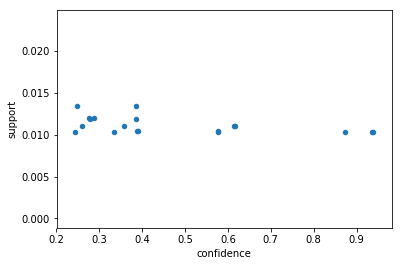

In [9]:
%matplotlib inline
import pandas as pd

if apriori.association_rules:
    df = pd.DataFrame(apriori.association_rules.values())
    df.columns = ["confidence", "support"]
    df.plot.scatter(x="confidence", y="support")
else:
    print("No association rules")

# Connected graph

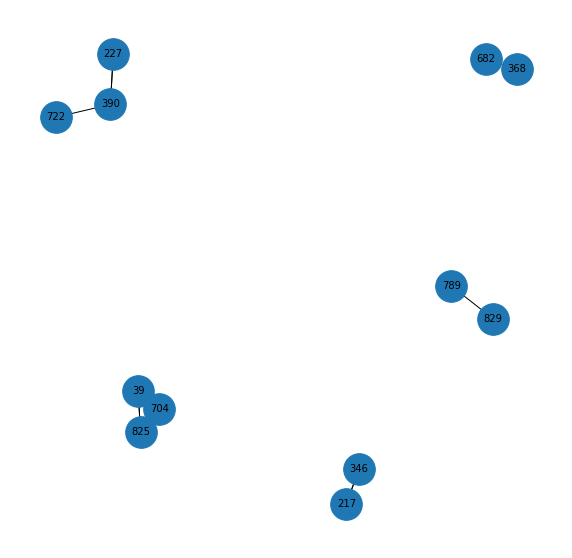

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

if apriori.association_rules:
    plt.figure(figsize=(10, 10))
    G = nx.DiGraph()
    for r, (c, s) in apriori.association_rules.items():
        end = list(r[1])[0]
        for rx in list(r[0]):
            G.add_edge(rx, end, weight=1, arrowsize=100)
    edges = [
        (u, v) for (u, v, d) in G.edges(data=True)
    ]
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=1000)
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=1, arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
    plt.axis("off")
    plt.show()
    print("")
else:
    print("No association rules")

# References
R. Agrawal and R. Srikant. Fast Algorithms for Mining Association Rules, VLDB '94, URL: http://www.vldb.org/conf/1994/P487.PDF